In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\f13e0\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_parquet("train_dataset_hackaton2023_train.gzip")

In [3]:
df.head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны


In [4]:
df.describe()

,customer_id,date_diff_post,buy_post,revenue,ownareaall_sqm
count,1.212938e+07,9.660867e+06,1.212938e+07,1.212938e+07,1.212938e+07
mean,1.980954e+07,2.048039e+01,7.964846e-01,1.067995e+02,2.155130e+02
std,1.138904e+07,1.527091e+01,4.026126e-01,1.074385e+02,1.225907e+02
min,2.989100e+04,0.000000e+00,0.000000e+00,1.000000e-02,0.000000e+00
25%,1.010852e+07,8.000000e+00,1.000000e+00,4.499000e+01,1.049000e+02
50%,2.127459e+07,1.700000e+01,1.000000e+00,7.998000e+01,2.104000e+02
75%,2.803856e+07,3.000000e+01,1.000000e+00,1.317725e+02,3.000000e+02
max,4.666180e+07,6.000000e+01,1.000000e+00,1.449971e+04,9.787000e+02


In [5]:
# Получаем информацию о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12129384 entries, 0 to 24261978
Data columns (total 9 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   group_name      object        
 4   revenue         float64       
 5   startdatetime   datetime64[ns]
 6   dish_name       object        
 7   ownareaall_sqm  float64       
 8   format_name     object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 925.4+ MB
None


In [6]:
# Добавим новые признаки
df['month'] = df['startdatetime'].dt.month
df['hour'] = df['startdatetime'].dt.hour
df['day_of_week'] = df['startdatetime'].dt.dayofweek

In [7]:
# Получаем информацию о данных
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12129384 entries, 0 to 24261978
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   group_name      object        
 4   revenue         float64       
 5   startdatetime   datetime64[ns]
 6   dish_name       object        
 7   ownareaall_sqm  float64       
 8   format_name     object        
 9   month           int64         
 10  hour            int64         
 11  day_of_week     int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(3)
memory usage: 1.2+ GB
None


In [8]:
df

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,month,hour,day_of_week
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,Кинг Фри станд,300.0,Отдельно стоящий без внешней зоны,12,12,0
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,Чикен Тар-Тар,300.0,Отдельно стоящий без внешней зоны,12,12,0
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,Соус Сырный,300.0,Отдельно стоящий без внешней зоны,12,12,0
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,Энергет.нап. Адреналин Раш,300.0,Отдельно стоящий без внешней зоны,12,12,0
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,Латте (СТАНД.),300.0,Отдельно стоящий без внешней зоны,12,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24261974,46661804,NaN,0,train,7.99,2023-08-01 18:04:56,"Эвервесс Кола джун 0,3л",300.0,Фудкорт с туалетом,8,18,1
24261975,46661804,NaN,0,train,84.98,2023-08-01 18:04:56,Воппер Джуниор,300.0,Фудкорт с туалетом,8,18,1
24261976,46661804,NaN,0,train,70.03,2023-08-01 18:04:56,Наггетсы (3 шт.),300.0,Фудкорт с туалетом,8,18,1
24261977,46661804,NaN,0,train,19.00,2023-08-01 18:04:56,Сырные Медальоны (3 шт.),300.0,Фудкорт с туалетом,8,18,1


Обнаружение и обработка пропусков важны, так как неполные данные могут исказить результаты анализа и классификации. Проанализируем признаки, чтобы определить, сколько недостающих значений присутствует в каждом из них. И затем заполним пропуски.

In [9]:
# Проверить наличие пропусков
missing_values = df.isnull().sum()
print("\nПропуски:")
print(missing_values)


Пропуски:
customer_id             0
date_diff_post    2468517
buy_post                0
group_name              0
revenue                 0
startdatetime           0
dish_name               0
ownareaall_sqm          0
format_name             0
month                   0
hour                    0
day_of_week             0
dtype: int64


In [10]:
#НАДО ЗАПОЛНИТЬ ПРОПУСКИ

# БАЛАНС КЛАССОВ

In [11]:
#подсчет количества экземпляров каждого класса в целевой переменной
buy_counts = df['buy_post'].value_counts()
print(buy_counts[0]/buy_counts[1])
print(buy_counts)


0.255517129052703
1    9660867
0    2468517
Name: buy_post, dtype: int64


# распределение

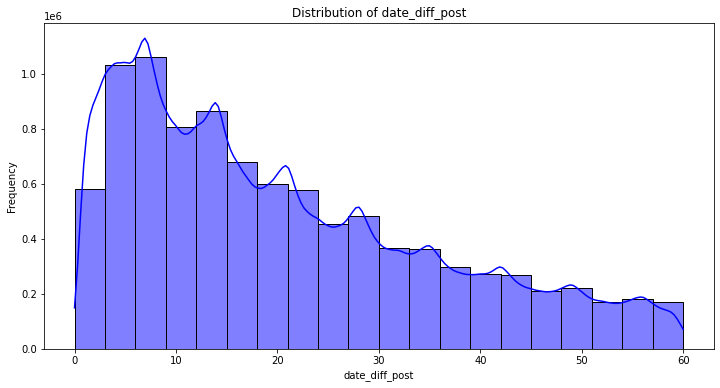

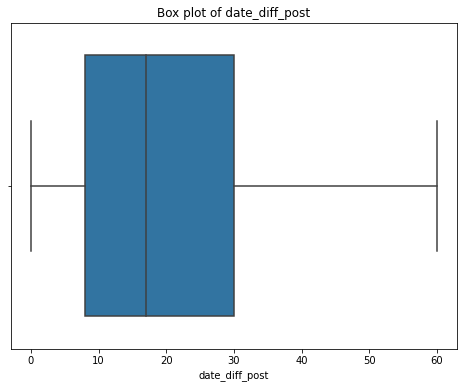

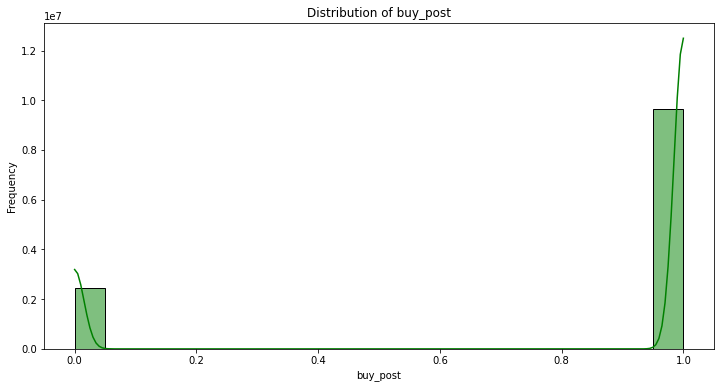

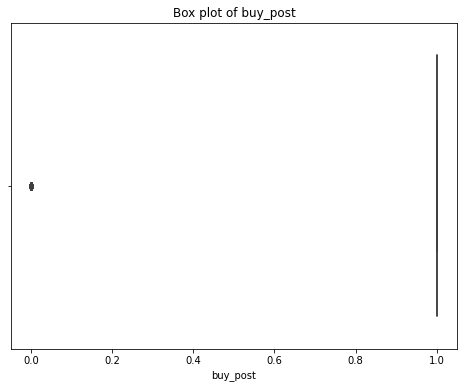

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Распределение целевого признака date_diff_post
plt.figure(figsize=(12, 6))
sns.histplot(df['date_diff_post'], bins=20, kde=True, color='blue')
plt.title('Distribution of date_diff_post')
plt.xlabel('date_diff_post')
plt.ylabel('Frequency')
plt.show()

# Ящик с усами для целевого признака date_diff_post
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['date_diff_post'])
plt.title('Box plot of date_diff_post')
plt.show()

# Распределение целевого признака buy_post
plt.figure(figsize=(12, 6))
sns.histplot(df['buy_post'], bins=20, kde=True, color='green')
plt.title('Distribution of buy_post')
plt.xlabel('buy_post')
plt.ylabel('Frequency')
plt.show()

# Ящик с усами для целевого признака buy_post
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['buy_post'])
plt.title('Box plot of buy_post')
plt.show()


Распределение целевых признаков предоставляет информацию о структуре данных и их характеристиках.

 медиана в ящике с усами покажет, где находится центр распределения.

Разброс данных:
Размах и длина ящика могут указать на разброс данных. Это может быть полезно для оценки диапазона значений и наличия выбросов.

Выбросы:
Точки за пределами ящика считаются выбросами. Их обнаружение может быть важным при решении о том, следует ли исключить или обработать эти значения.

Форма распределения

Частота значений:
Гистограмма позволяет оценить, как часто встречаются различные значения.

На основе этих аспектов можно принимать решения относительно предобработки данных, выявления выбросов, выбора подходящих методов анализа и построения моделей машинного обучения.

#### Данные не сбалансированы!!
SMOTE? oversample? Веса?

# Блюда в цифры

In [13]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# dish_name в числовой формат
df['dish_name'] = label_encoder.fit_transform(df['dish_name'])

print(df.info())

# соответствия чисел и блюд
encoded_dishes = pd.DataFrame({
    'dish_name_encoded': df['dish_name'].unique(),
    'dish_name': label_encoder.inverse_transform(df['dish_name'].unique())
})

print(encoded_dishes)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12129384 entries, 0 to 24261978
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   group_name      object        
 4   revenue         float64       
 5   startdatetime   datetime64[ns]
 6   dish_name       int32         
 7   ownareaall_sqm  float64       
 8   format_name     object        
 9   month           int64         
 10  hour            int64         
 11  day_of_week     int64         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(2)
memory usage: 1.1+ GB
None
      dish_name_encoded                          dish_name
0                   589                     Кинг Фри станд
1                   982                      Чикен Тар-Тар
2                   900                        Соус Сырный
3                  1035         Энергет.нап. Адре

In [14]:
df.head()

,customer_id,date_diff_post,buy_post,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,month,hour,day_of_week
0,29891,9.0,1,train,69.99,2022-12-05 12:03:58,589,300.0,Отдельно стоящий без внешней зоны,12,12,0
1,29891,9.0,1,train,190.00,2022-12-05 12:03:58,982,300.0,Отдельно стоящий без внешней зоны,12,12,0
2,29891,9.0,1,train,9.99,2022-12-05 12:03:58,900,300.0,Отдельно стоящий без внешней зоны,12,12,0
3,29891,9.0,1,train,119.99,2022-12-05 12:03:58,1035,300.0,Отдельно стоящий без внешней зоны,12,12,0
4,29891,9.0,1,train,119.99,2022-12-05 14:28:35,625,300.0,Отдельно стоящий без внешней зоны,12,14,0


In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['group_name'] = label_encoder.fit_transform(df['group_name'])
df['format_name'] = label_encoder.fit_transform(df['format_name'])


print(df['group_name'].unique())

print(df['format_name'].unique())
for original, encoded in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
    print(f"{encoded}: {original}")

print(df.info())


[0]
[2 6 7 3 8 4 1 5 0]
0: Не заполнено
1: Отдельно стоящий
2: Отдельно стоящий без внешней зоны
3: Отдельно стоящий без внешней зоны без туалета
4: Отдельно стоящий без туалета
5: Отдельно стоящий с внешн.зоной без туалета
6: Отдельно стоящий с внешней зоной
7: Фудкорт без туалета
8: Фудкорт с туалетом
<class 'pandas.core.frame.DataFrame'>
Int64Index: 12129384 entries, 0 to 24261978
Data columns (total 12 columns):
 #   Column          Dtype         
---  ------          -----         
 0   customer_id     int64         
 1   date_diff_post  float64       
 2   buy_post        int64         
 3   group_name      int32         
 4   revenue         float64       
 5   startdatetime   datetime64[ns]
 6   dish_name       int32         
 7   ownareaall_sqm  float64       
 8   format_name     int32         
 9   month           int64         
 10  hour            int64         
 11  day_of_week     int64         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(5)
memory usage: 1.0 

In [16]:
df = df.drop(columns=['group_name'])

# Корреляция

<ipython-input-17-a83845fc24b2>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_m = df.corr()


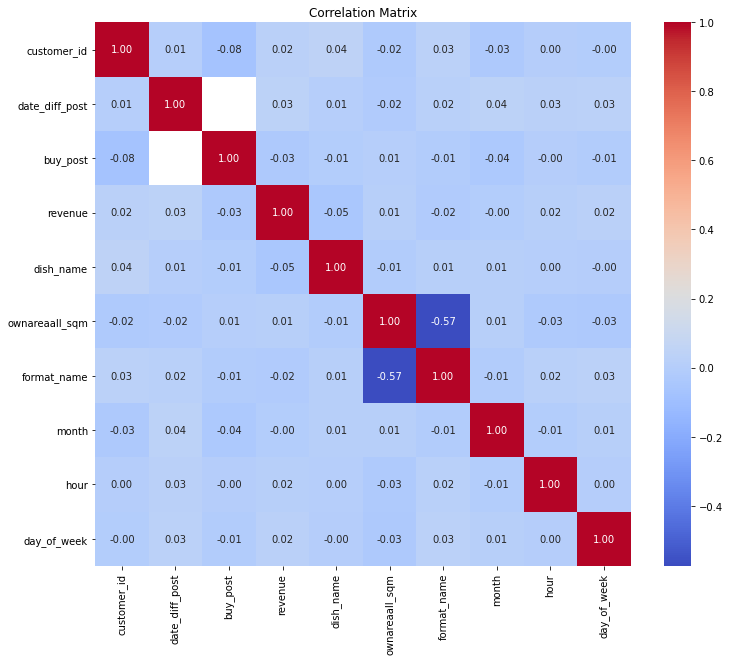

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# корреляци
correlation_m = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_m, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [18]:
correlation_m

,customer_id,date_diff_post,buy_post,revenue,dish_name,ownareaall_sqm,format_name,month,hour,day_of_week
customer_id,1.000000,0.008563,-0.075547,0.023711,0.042081,-0.024211,0.030805,-0.030461,0.001398,-0.003962
date_diff_post,0.008563,1.000000,NaN,0.034748,0.009474,-0.019564,0.020679,0.036071,0.027006,0.029957
buy_post,-0.075547,NaN,1.000000,-0.030912,-0.007876,0.007663,-0.012073,-0.038248,-0.002230,-0.011474
revenue,0.023711,0.034748,-0.030912,1.000000,-0.049096,0.011853,-0.017812,-0.004558,0.015699,0.022248
dish_name,0.042081,0.009474,-0.007876,-0.049096,1.000000,-0.011385,0.012609,0.010739,0.004971,-0.001401
ownareaall_sqm,-0.024211,-0.019564,0.007663,0.011853,-0.011385,1.000000,-0.574379,0.009985,-0.026388,-0.032468
format_name,0.030805,0.020679,-0.012073,-0.017812,0.012609,-0.574379,1.000000,-0.010485,0.020876,0.030109
month,-0.030461,0.036071,-0.038248,-0.004558,0.010739,0.009985,-0.010485,1.000000,-0.008574,0.013970
hour,0.001398,0.027006,-0.002230,0.015699,0.004971,-0.026388,0.020876,-0.008574,1.000000,0.001200
day_of_week,-0.003962,0.029957,-0.011474,0.022248,-0.001401,-0.032468,0.030109,0.013970,0.001200,1.000000


Таргет оттока имеет некоторую корреляцию с временем (месяц и час).

# БАЛАНС КЛАССОВ

# BASELINE 1

In [19]:
df

,customer_id,date_diff_post,buy_post,revenue,startdatetime,dish_name,ownareaall_sqm,format_name,month,hour,day_of_week
0,29891,9.0,1,69.99,2022-12-05 12:03:58,589,300.0,2,12,12,0
1,29891,9.0,1,190.00,2022-12-05 12:03:58,982,300.0,2,12,12,0
2,29891,9.0,1,9.99,2022-12-05 12:03:58,900,300.0,2,12,12,0
3,29891,9.0,1,119.99,2022-12-05 12:03:58,1035,300.0,2,12,12,0
4,29891,9.0,1,119.99,2022-12-05 14:28:35,625,300.0,2,12,14,0
...,...,...,...,...,...,...,...,...,...,...,...
24261974,46661804,NaN,0,7.99,2023-08-01 18:04:56,1021,300.0,8,8,18,1
24261975,46661804,NaN,0,84.98,2023-08-01 18:04:56,501,300.0,8,8,18,1
24261976,46661804,NaN,0,70.03,2023-08-01 18:04:56,719,300.0,8,8,18,1
24261977,46661804,NaN,0,19.00,2023-08-01 18:04:56,916,300.0,8,8,18,1


In [20]:
clients = df.groupby(['customer_id'], as_index=False).sum()[['customer_id', 'revenue', 'ownareaall_sqm']]

clients[['revenue_max', 'ownareaall_sqm_max']] = df.groupby(['customer_id'], as_index=False).max()[['revenue', 'ownareaall_sqm']]
clients[['revenue_min','ownareaall_sqm_min']] = df.groupby(['customer_id'], as_index=False).min()[['revenue', 'ownareaall_sqm']]
clients[['revenue_diff', 'ownareaall_sqm_diff']] = df.groupby(['customer_id'], as_index=False)[['revenue', 'ownareaall_sqm']].diff()

<ipython-input-20-4813e41576f4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  clients = df.groupby(['customer_id'], as_index=False).sum()[['customer_id', 'revenue', 'ownareaall_sqm']]


In [21]:
df.groupby(['customer_id'], as_index=False)['month'].agg(pd.Series.mode)['month']

0         12
1         11
2          6
3          6
4         12
          ..
499995     7
499996     7
499997     7
499998     8
499999     8
Name: month, Length: 500000, dtype: object

In [22]:
clients['fav_month'] = df.groupby(['customer_id'], as_index=False)['month'].agg(lambda x: pd.Series.mode(x)[0])['month']
clients['fav_hour'] = df.groupby(['customer_id'], as_index=False)['hour'].agg(lambda x: pd.Series.mode(x)[0])['hour']
clients['fav_day'] = df.groupby(['customer_id'], as_index=False)['day_of_week'].agg(lambda x: pd.Series.mode(x)[0])['day_of_week']
clients['fav_dish'] = df.groupby(['customer_id'], as_index=False)['dish_name'].agg(lambda x: pd.Series.mode(x)[0])['dish_name']
clients['fave_format'] = df.groupby(['customer_id'], as_index=False)['format_name'].agg(lambda x: pd.Series.mode(x)[0])['format_name']

In [23]:
clients

,customer_id,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,ownareaall_sqm_diff,fav_month,fav_hour,fav_day,fav_dish,fave_format
0,29891,5087.35,14927.00,439.98,463.00,1.00,300.00,NaN,NaN,12,9,2,47,6
1,30477,5675.60,19520.00,399.99,320.00,0.39,320.00,120.01,0.0,11,9,1,588,2
2,31426,9393.59,13158.00,854.99,153.00,1.00,153.00,-180.01,0.0,6,15,4,900,7
3,44491,514.90,1288.84,229.99,139.00,19.99,88.42,110.00,0.0,6,21,5,857,3
4,44939,1664.83,4286.86,267.97,280.00,1.00,129.27,0.00,0.0,12,11,5,87,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,935.90,1237.83,189.99,112.53,1.00,112.53,-25.00,0.0,7,11,0,589,7
499996,46625265,1199.87,1560.00,169.98,120.00,49.99,120.00,-25.00,0.0,7,15,0,900,8
499997,46639170,1089.92,882.20,179.99,80.20,1.00,80.20,70.00,0.0,7,21,0,847,7
499998,46654016,1219.93,1620.00,429.99,270.00,129.98,270.00,-45.00,0.0,8,12,1,457,6


In [24]:


# Сортировка данных по 'customer_id' и 'feature1'
sorted_df = df[['customer_id', 'dish_name']].sort_values(['customer_id', 'dish_name'], ascending=[True, False])

# Группировка данных по 'customer_id' и создание топ-5 результатов для каждой группы
top5_results = sorted_df.groupby('customer_id').head(10)

# Создание новых колонок для топ-5 результатов
for i in range(10):
    col_name = f'top10_dish_{i}'
    top5_results[col_name] = top5_results.groupby('customer_id')['dish_name'].shift(-i)

# Удаление дубликатов, оставление уникальных строк для каждого 'customer_id'
top5_results = top5_results.drop_duplicates(subset='customer_id')

# Объединение исходного датасета с топ-5 результатами
result_df = pd.merge(clients, top5_results.drop(columns='dish_name'), on='customer_id', how='left')

# Вывод результата
result_df

<ipython-input-24-60ff681c829f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['dish_name'].shift(-i)
<ipython-input-24-60ff681c829f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['dish_name'].shift(-i)
<ipython-input-24-60ff681c829f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

,customer_id,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,ownareaall_sqm_diff,fav_month,...,top10_dish_0,top10_dish_1,top10_dish_2,top10_dish_3,top10_dish_4,top10_dish_5,top10_dish_6,top10_dish_7,top10_dish_8,top10_dish_9
0,29891,5087.35,14927.00,439.98,463.00,1.00,300.00,NaN,NaN,12,...,1035,1032.0,982.0,978.0,977.0,977.0,961.0,960.0,960.0,913.0
1,30477,5675.60,19520.00,399.99,320.00,0.39,320.00,120.01,0.0,11,...,1008,982.0,982.0,982.0,982.0,982.0,982.0,970.0,919.0,916.0
2,31426,9393.59,13158.00,854.99,153.00,1.00,153.00,-180.01,0.0,6,...,1021,917.0,917.0,902.0,902.0,902.0,902.0,902.0,902.0,902.0
3,44491,514.90,1288.84,229.99,139.00,19.99,88.42,110.00,0.0,6,...,858,858.0,857.0,857.0,857.0,857.0,857.0,589.0,572.0,510.0
4,44939,1664.83,4286.86,267.97,280.00,1.00,129.27,0.00,0.0,12,...,916,900.0,900.0,899.0,899.0,898.0,898.0,719.0,687.0,687.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,935.90,1237.83,189.99,112.53,1.00,112.53,-25.00,0.0,7,...,978,978.0,913.0,900.0,720.0,720.0,589.0,589.0,588.0,515.0
499996,46625265,1199.87,1560.00,169.98,120.00,49.99,120.00,-25.00,0.0,7,...,987,900.0,900.0,900.0,900.0,735.0,653.0,653.0,653.0,589.0
499997,46639170,1089.92,882.20,179.99,80.20,1.00,80.20,70.00,0.0,7,...,893,847.0,847.0,847.0,847.0,847.0,847.0,786.0,718.0,718.0
499998,46654016,1219.93,1620.00,429.99,270.00,129.98,270.00,-45.00,0.0,8,...,1023,1017.0,858.0,656.0,652.0,457.0,NaN,NaN,NaN,NaN


In [25]:
top5_results = sorted_df.groupby('customer_id').tail(10)

# Создание новых колонок для топ-5 результатов
for i in range(10):
    col_name = f'tail10_feature1_{i}'
    top5_results[col_name] = top5_results.groupby('customer_id')['dish_name'].shift(-i)

# Удаление дубликатов, оставление уникальных строк для каждого 'customer_id'
top5_results = top5_results.drop_duplicates(subset='customer_id')

# Объединение исходного датасета с топ-5 результатами
result_df = pd.merge(result_df, top5_results.drop(columns='dish_name'), on='customer_id', how='left')



<ipython-input-25-2aa2c6a5a28b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['dish_name'].shift(-i)
<ipython-input-25-2aa2c6a5a28b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['dish_name'].shift(-i)
<ipython-input-25-2aa2c6a5a28b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [26]:
sorted_df = df[['customer_id', 'revenue']].sort_values(['customer_id', 'revenue'], ascending=[True, False])

top5_results = sorted_df.groupby('customer_id').tail(10)

# Создание новых колонок для топ-5 результатов
for i in range(10):
    col_name = f'tail10_revenue_{i}'
    top5_results[col_name] = top5_results.groupby('customer_id')['revenue'].shift(-i)

# Удаление дубликатов, оставление уникальных строк для каждого 'customer_id'
top5_results = top5_results.drop_duplicates(subset='customer_id')

# Объединение исходного датасета с топ-5 результатами
result_df = pd.merge(result_df, top5_results.drop(columns='revenue'), on='customer_id', how='left')

<ipython-input-26-c7c4615c801a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['revenue'].shift(-i)
<ipython-input-26-c7c4615c801a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['revenue'].shift(-i)
<ipython-input-26-c7c4615c801a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [27]:
top5_results = sorted_df.groupby('customer_id').head(10)

# Создание новых колонок для топ-5 результатов
for i in range(10):
    col_name = f'top10_revenue_{i}'
    top5_results[col_name] = top5_results.groupby('customer_id')['revenue'].shift(-i)

# Удаление дубликатов, оставление уникальных строк для каждого 'customer_id'
top5_results = top5_results.drop_duplicates(subset='customer_id')

# Объединение исходного датасета с топ-5 результатами
result_df = pd.merge(result_df, top5_results.drop(columns='revenue'), on='customer_id', how='left')

<ipython-input-27-f412ea714f60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['revenue'].shift(-i)
<ipython-input-27-f412ea714f60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['revenue'].shift(-i)
<ipython-input-27-f412ea714f60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [28]:
sorted_df = df[['customer_id', 'ownareaall_sqm']].sort_values(['customer_id', 'ownareaall_sqm'], ascending=[True, False])

top5_results = sorted_df.groupby('customer_id').tail(3)

# Создание новых колонок для топ-5 результатов
for i in range(3):
    col_name = f'tail10_ownareaall_sqm_{i}'
    top5_results[col_name] = top5_results.groupby('customer_id')['ownareaall_sqm'].shift(-i)

# Удаление дубликатов, оставление уникальных строк для каждого 'customer_id'
top5_results = top5_results.drop_duplicates(subset='customer_id')

# Объединение исходного датасета с топ-5 результатами
result_df = pd.merge(result_df, top5_results.drop(columns='ownareaall_sqm'), on='customer_id', how='left')

<ipython-input-28-a92a9e153131>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['ownareaall_sqm'].shift(-i)
<ipython-input-28-a92a9e153131>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['ownareaall_sqm'].shift(-i)
<ipython-input-28-a92a9e153131>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [29]:
top5_results = sorted_df.groupby('customer_id').head(3)

# Создание новых колонок для топ-5 результатов
for i in range(3):
    col_name = f'top10_ownareaall_sqm_{i}'
    top5_results[col_name] = top5_results.groupby('customer_id')['ownareaall_sqm'].shift(-i)

# Удаление дубликатов, оставление уникальных строк для каждого 'customer_id'
top5_results = top5_results.drop_duplicates(subset='customer_id')

# Объединение исходного датасета с топ-5 результатами
result_df = pd.merge(result_df, top5_results.drop(columns='ownareaall_sqm'), on='customer_id', how='left')

<ipython-input-29-fce3c6ddc938>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['ownareaall_sqm'].shift(-i)
<ipython-input-29-fce3c6ddc938>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top5_results[col_name] = top5_results.groupby('customer_id')['ownareaall_sqm'].shift(-i)
<ipython-input-29-fce3c6ddc938>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [30]:
df.date_diff_post.min()

0.0

In [31]:
result_df = pd.merge(df[['customer_id', 'date_diff_post', 'buy_post']].groupby(['customer_id'], as_index=False).head(1), result_df, on='customer_id', how='right')

In [32]:
result_df

,customer_id,date_diff_post,buy_post,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,...,top10_revenue_6,top10_revenue_7,top10_revenue_8,top10_revenue_9,tail10_ownareaall_sqm_0,tail10_ownareaall_sqm_1,tail10_ownareaall_sqm_2,top10_ownareaall_sqm_0,top10_ownareaall_sqm_1,top10_ownareaall_sqm_2
0,29891,9.0,1,5087.35,14927.00,439.98,463.00,1.00,300.00,NaN,...,249.96,229.96,229.96,209.99,300.00,300.00,300.00,463.00,463.00,463.00
1,30477,10.0,1,5675.60,19520.00,399.99,320.00,0.39,320.00,120.01,...,249.98,192.99,192.99,169.99,320.00,320.00,320.00,320.00,320.00,320.00
2,31426,4.0,1,9393.59,13158.00,854.99,153.00,1.00,153.00,-180.01,...,269.99,248.99,239.99,230.00,153.00,153.00,153.00,153.00,153.00,153.00
3,44491,42.0,1,514.90,1288.84,229.99,139.00,19.99,88.42,110.00,...,22.00,19.99,19.99,19.99,139.00,88.42,88.42,139.00,139.00,139.00
4,44939,9.0,1,1664.83,4286.86,267.97,280.00,1.00,129.27,0.00,...,79.99,59.99,53.96,53.96,129.27,129.27,129.27,280.00,280.00,280.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,NaN,0,935.90,1237.83,189.99,112.53,1.00,112.53,-25.00,...,74.99,74.99,74.99,49.99,112.53,112.53,112.53,112.53,112.53,112.53
499996,46625265,NaN,0,1199.87,1560.00,169.98,120.00,49.99,120.00,-25.00,...,70.00,70.00,59.99,49.99,120.00,120.00,120.00,120.00,120.00,120.00
499997,46639170,10.0,1,1089.92,882.20,179.99,80.20,1.00,80.20,70.00,...,49.99,49.99,1.00,1.00,80.20,80.20,80.20,80.20,80.20,80.20
499998,46654016,15.0,1,1219.93,1620.00,429.99,270.00,129.98,270.00,-45.00,...,NaN,NaN,NaN,NaN,270.00,270.00,270.00,270.00,270.00,270.00


# Modeling

In [33]:
result_df = result_df.fillna(0)

In [34]:
result_df

,customer_id,date_diff_post,buy_post,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,...,top10_revenue_6,top10_revenue_7,top10_revenue_8,top10_revenue_9,tail10_ownareaall_sqm_0,tail10_ownareaall_sqm_1,tail10_ownareaall_sqm_2,top10_ownareaall_sqm_0,top10_ownareaall_sqm_1,top10_ownareaall_sqm_2
0,29891,9.0,1,5087.35,14927.00,439.98,463.00,1.00,300.00,0.00,...,249.96,229.96,229.96,209.99,300.00,300.00,300.00,463.00,463.00,463.00
1,30477,10.0,1,5675.60,19520.00,399.99,320.00,0.39,320.00,120.01,...,249.98,192.99,192.99,169.99,320.00,320.00,320.00,320.00,320.00,320.00
2,31426,4.0,1,9393.59,13158.00,854.99,153.00,1.00,153.00,-180.01,...,269.99,248.99,239.99,230.00,153.00,153.00,153.00,153.00,153.00,153.00
3,44491,42.0,1,514.90,1288.84,229.99,139.00,19.99,88.42,110.00,...,22.00,19.99,19.99,19.99,139.00,88.42,88.42,139.00,139.00,139.00
4,44939,9.0,1,1664.83,4286.86,267.97,280.00,1.00,129.27,0.00,...,79.99,59.99,53.96,53.96,129.27,129.27,129.27,280.00,280.00,280.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,46624509,0.0,0,935.90,1237.83,189.99,112.53,1.00,112.53,-25.00,...,74.99,74.99,74.99,49.99,112.53,112.53,112.53,112.53,112.53,112.53
499996,46625265,0.0,0,1199.87,1560.00,169.98,120.00,49.99,120.00,-25.00,...,70.00,70.00,59.99,49.99,120.00,120.00,120.00,120.00,120.00,120.00
499997,46639170,10.0,1,1089.92,882.20,179.99,80.20,1.00,80.20,70.00,...,49.99,49.99,1.00,1.00,80.20,80.20,80.20,80.20,80.20,80.20
499998,46654016,15.0,1,1219.93,1620.00,429.99,270.00,129.98,270.00,-45.00,...,0.00,0.00,0.00,0.00,270.00,270.00,270.00,270.00,270.00,270.00


## Очистка пропусков

In [35]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import missingno as msno

<Axes: >

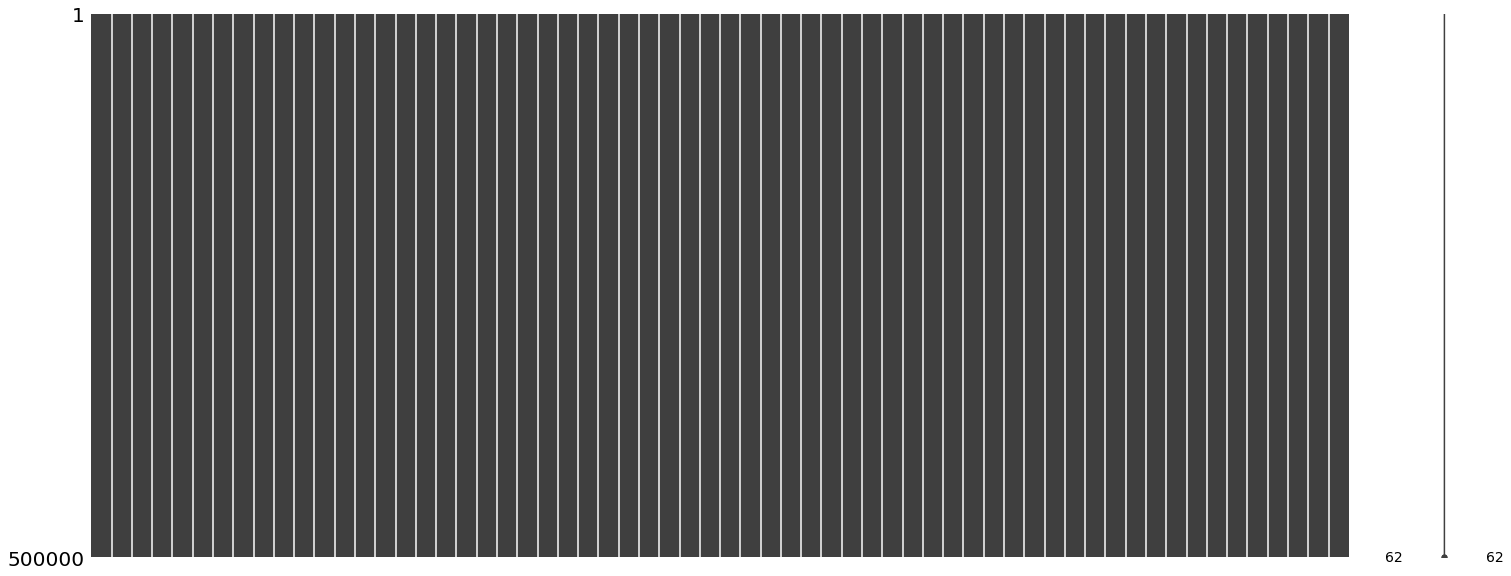

In [37]:
msno.matrix(result_df)

In [38]:
missing_values = ((result_df.isna().sum() / len(result_df)) * 100).sort_values(ascending=False)
missing_values

customer_id               0.0
top10_revenue_0           0.0
tail10_feature1_7         0.0
tail10_feature1_8         0.0
tail10_feature1_9         0.0
                         ... 
top10_dish_9              0.0
tail10_feature1_0         0.0
tail10_feature1_1         0.0
tail10_feature1_2         0.0
top10_ownareaall_sqm_2    0.0
Length: 62, dtype: float64

In [39]:
df_model = result_df.copy()

In [40]:
df_model.revenue_diff 

0           0.00
1         120.01
2        -180.01
3         110.00
4           0.00
           ...  
499995    -25.00
499996    -25.00
499997     70.00
499998    -45.00
499999      0.00
Name: revenue_diff, Length: 500000, dtype: float64

In [41]:
df_model.revenue_diff  = df_model.revenue_diff.fillna(0)

In [42]:
df_model.ownareaall_sqm_diff

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
499995    0.0
499996    0.0
499997    0.0
499998    0.0
499999    0.0
Name: ownareaall_sqm_diff, Length: 500000, dtype: float64

In [43]:
df_model.ownareaall_sqm_diff.unique()

array([   0.  ,  163.  ,  -50.58, ...,  212.29, -248.1 ,  -14.6 ])

In [44]:
df_model.ownareaall_sqm_diff  = df_model.ownareaall_sqm_diff.fillna(0)

In [45]:
df_model.date_diff_post

0          9.0
1         10.0
2          4.0
3         42.0
4          9.0
          ... 
499995     0.0
499996     0.0
499997    10.0
499998    15.0
499999     0.0
Name: date_diff_post, Length: 500000, dtype: float64

In [46]:
df_model.date_diff_post  = df_model.date_diff_post.fillna(0)

In [47]:
missing_values = ((df_model.isna().sum() / len(df_model)) * 100).sort_values(ascending=False)
missing_values

customer_id               0.0
top10_revenue_0           0.0
tail10_feature1_7         0.0
tail10_feature1_8         0.0
tail10_feature1_9         0.0
                         ... 
top10_dish_9              0.0
tail10_feature1_0         0.0
tail10_feature1_1         0.0
tail10_feature1_2         0.0
top10_ownareaall_sqm_2    0.0
Length: 62, dtype: float64

In [48]:
df_model = df_model.dropna()
df_model.reset_index(inplace=True, drop=True)

In [49]:
df_model.head()

,customer_id,date_diff_post,buy_post,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,...,top10_revenue_6,top10_revenue_7,top10_revenue_8,top10_revenue_9,tail10_ownareaall_sqm_0,tail10_ownareaall_sqm_1,tail10_ownareaall_sqm_2,top10_ownareaall_sqm_0,top10_ownareaall_sqm_1,top10_ownareaall_sqm_2
0,29891,9.0,1,5087.35,14927.00,439.98,463.0,1.00,300.00,0.00,...,249.96,229.96,229.96,209.99,300.00,300.00,300.00,463.0,463.0,463.0
1,30477,10.0,1,5675.60,19520.00,399.99,320.0,0.39,320.00,120.01,...,249.98,192.99,192.99,169.99,320.00,320.00,320.00,320.0,320.0,320.0
2,31426,4.0,1,9393.59,13158.00,854.99,153.0,1.00,153.00,-180.01,...,269.99,248.99,239.99,230.00,153.00,153.00,153.00,153.0,153.0,153.0
3,44491,42.0,1,514.90,1288.84,229.99,139.0,19.99,88.42,110.00,...,22.00,19.99,19.99,19.99,139.00,88.42,88.42,139.0,139.0,139.0
4,44939,9.0,1,1664.83,4286.86,267.97,280.0,1.00,129.27,0.00,...,79.99,59.99,53.96,53.96,129.27,129.27,129.27,280.0,280.0,280.0


In [50]:
df_model.shape

(500000, 62)

## Предсказание buy_post

In [51]:
# %pip install catboost

In [52]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, log_loss, auc, roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [53]:
X = df_model.drop(['buy_post', 'customer_id','date_diff_post'], axis=1)
y = df_model['buy_post']

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    _scoring = ['roc_auc', 'precision', 'recall', 'f1']
    results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
    return {"Training roc_auc scores": results['train_roc_auc'],
              "Mean Training roc_auc": results['train_roc_auc'].mean(),
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation roc_auc scores": results['test_roc_auc'],
              "Mean Validation roc_auc": results['test_roc_auc'].mean(),
              "Std Validation roc_auc": results['test_roc_auc'].std(),
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }


def plot_result(x_label, y_label, plot_title, train_data, val_data):
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

In [98]:
# result_df.to_csv('')

,customer_id,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,ownareaall_sqm_diff,fav_month,...,top10_revenue_6,top10_revenue_7,top10_revenue_8,top10_revenue_9,tail10_ownareaall_sqm_0,tail10_ownareaall_sqm_1,tail10_ownareaall_sqm_2,top10_ownareaall_sqm_0,top10_ownareaall_sqm_1,top10_ownareaall_sqm_2
0,52341,2255.77,9489.20,139.99,338.90,1.00,338.9,0.00,0.0,2,...,99.99,99.99,99.99,99.99,338.9,338.9,338.9,338.90,338.90,338.90
1,69175,3872.76,12494.30,239.99,263.00,1.00,227.3,0.00,0.0,7,...,120.97,120.97,120.97,119.99,227.3,227.3,227.3,263.00,263.00,263.00
2,73427,7881.45,11509.95,399.99,435.43,1.00,100.0,0.00,0.0,1,...,269.99,259.99,239.99,234.96,144.6,100.0,100.0,435.43,435.43,435.43
3,134577,1491.88,2491.20,200.00,207.60,44.98,207.6,0.00,0.0,9,...,109.99,99.99,99.99,49.99,207.6,207.6,207.6,207.60,207.60,207.60
4,156357,1676.89,1651.42,309.99,137.14,9.99,124.0,0.00,0.0,12,...,109.99,99.99,99.99,60.00,124.0,124.0,124.0,137.14,137.14,137.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112329,46540272,1324.90,810.00,299.99,81.00,49.99,81.0,-98.99,29.4,7,...,99.99,99.99,94.99,49.99,81.0,81.0,81.0,81.00,81.00,81.00
112330,46569275,1131.94,2836.20,299.99,285.20,1.00,89.8,0.00,-169.1,7,...,84.98,70.03,16.00,14.99,89.8,89.8,89.8,285.20,285.20,285.20
112331,46601088,579.95,855.20,124.99,106.90,10.00,106.9,-228.93,-169.1,7,...,65.00,10.00,0.00,0.00,106.9,106.9,106.9,106.90,106.90,106.90
112332,46632765,739.95,1350.00,209.99,225.00,70.00,225.0,237.99,-198.5,7,...,0.00,0.00,0.00,0.00,225.0,225.0,225.0,225.00,225.00,225.00


### AUTOML

In [244]:
test_df = pd.read_csv('result_df.csv')

In [241]:
N_THREADS = 4
N_FOLDS = 5
RANDOM_STATE = 42
TEST_SIZE = 0.2
TIMEOUT = 900

In [242]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

automl = TabularAutoML(timeout = TIMEOUT,
                       cpu_limit = N_THREADS,
    task = Task(
        name = 'binary',
        metric = lambda y_true, y_pred: f1_score(y_true, (y_pred > 0.5)*1))
)
oof_pred = automl.fit_predict(
    df_model,
    roles = {'target': 'buy_post', 'drop': ['customer_id','date_diff_post', ]}, verbose = 1
)

[13:14:12] Stdout logging level is INFO.
[13:14:12] Task: binary

[13:14:12] Start automl preset with listed constraints:
[13:14:12] - time: 900.00 seconds
[13:14:12] - CPU: 4 cores
[13:14:12] - memory: 16 GB

[13:14:12] Train data shape: (500000, 62)

[13:14:20] Layer 1 train process start. Time left 891.64 secs
[13:14:54] Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
[13:15:12] Fitting Lvl_0_Pipe_0_Mod_0_LinearL2 finished. score = 0.8346050186810281
[13:15:12] Lvl_0_Pipe_0_Mod_0_LinearL2 fitting and predicting completed
[13:15:12] Time left 839.60 secs

[13:15:34] Selector_LightGBM fitting and predicting completed
[13:16:14] Start fitting Lvl_0_Pipe_1_Mod_0_LightGBM ...
[13:17:20] Time limit exceeded after calculating fold 2

[13:17:20] Fitting Lvl_0_Pipe_1_Mod_0_LightGBM finished. score = 0.8365714062850401
[13:17:20] Lvl_0_Pipe_1_Mod_0_LightGBM fitting and predicting completed
[13:17:20] Start hyperparameters optimization for Lvl_0_Pipe_1_Mod_1_Tuned_LightGBM ... Time budget is 1.0

In [245]:
test_pred = automl.predict(test_df)

In [246]:
test_df['buy_post'] = (test_pred.data[:, 0] > 0.25).astype(int)

In [247]:
test_df

,Unnamed: 0,customer_id,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,ownareaall_sqm_diff,...,top10_revenue_8,top10_revenue_9,tail10_ownareaall_sqm_0,tail10_ownareaall_sqm_1,tail10_ownareaall_sqm_2,top10_ownareaall_sqm_0,top10_ownareaall_sqm_1,top10_ownareaall_sqm_2,target_class,buy_post
0,0,52341,2255.77,9489.20,139.99,338.90,1.00,338.9,0.00,0.0,...,99.99,99.99,338.9,338.9,338.9,338.90,338.90,338.90,1,1
1,1,69175,3872.76,12494.30,239.99,263.00,1.00,227.3,0.00,0.0,...,120.97,119.99,227.3,227.3,227.3,263.00,263.00,263.00,1,1
2,2,73427,7881.45,11509.95,399.99,435.43,1.00,100.0,0.00,0.0,...,239.99,234.96,144.6,100.0,100.0,435.43,435.43,435.43,1,1
3,3,134577,1491.88,2491.20,200.00,207.60,44.98,207.6,0.00,0.0,...,99.99,49.99,207.6,207.6,207.6,207.60,207.60,207.60,0,1
4,4,156357,1676.89,1651.42,309.99,137.14,9.99,124.0,0.00,0.0,...,99.99,60.00,124.0,124.0,124.0,137.14,137.14,137.14,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112329,112329,46540272,1324.90,810.00,299.99,81.00,49.99,81.0,-98.99,29.4,...,94.99,49.99,81.0,81.0,81.0,81.00,81.00,81.00,1,1
112330,112330,46569275,1131.94,2836.20,299.99,285.20,1.00,89.8,0.00,-169.1,...,16.00,14.99,89.8,89.8,89.8,285.20,285.20,285.20,1,1
112331,112331,46601088,579.95,855.20,124.99,106.90,10.00,106.9,-228.93,-169.1,...,0.00,0.00,106.9,106.9,106.9,106.90,106.90,106.90,1,1
112332,112332,46632765,739.95,1350.00,209.99,225.00,70.00,225.0,237.99,-198.5,...,0.00,0.00,225.0,225.0,225.0,225.00,225.00,225.00,1,1


In [248]:
df_t2 = pd.read_csv('submit_finnal_2.csv', sep=';')

In [249]:
df_t2

,customer_id,date_diff_post,buy_post
0,13220760,17.902353,1
1,30315975,15.434191,1
2,21679985,18.550130,1
3,29754274,18.778276,1
4,7797823,11.958079,1
...,...,...,...
112329,14023374,15.443827,0
112330,34923292,16.212638,1
112331,32761835,15.971400,1
112332,38322785,16.931498,1


In [250]:
test_df = test_df.merge(df_t2[['customer_id','date_diff_post']], on='customer_id', how='left')

In [251]:
df_res_final_5 = test_df[['customer_id', 'date_diff_post', 'buy_post']]

In [252]:
df_res_final_5

,customer_id,date_diff_post,buy_post
0,52341,16.431520,1
1,69175,15.292136,1
2,73427,13.037326,1
3,134577,16.993163,1
4,156357,17.696714,1
...,...,...,...
112329,46540272,16.256875,1
112330,46569275,18.768846,1
112331,46601088,16.364876,1
112332,46632765,16.041121,1


In [253]:
df_res_final_5['buy_post'].value_counts()

1    112334
Name: buy_post, dtype: int64

In [ ]:
fpr, tpr, tresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='lime', label='ROC curve ansamble(area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('LogReg ROC AUC = %0.3f' %roc_auc)
plt.legend(loc='lower right')
plt.show()

In [194]:
np.savetxt(r'np3.txt', df_res_final_5.values, fmt='%d')

### FineTune CatBoost

In [ ]:
catboost = CatBoostClassifier(metric_period = 250)
catboost.fit(X, y)
y_pred_cb = catboost.predict(X_test)
y_score_cb = catboost.predict_proba(X_test)[:,1]

Learning rate set to 0.125676
0:	learn: 0.6615938	total: 23.1ms	remaining: 23.1s
250:	learn: 0.5449161	total: 3.79s	remaining: 11.3s
500:	learn: 0.5357386	total: 7.47s	remaining: 7.44s


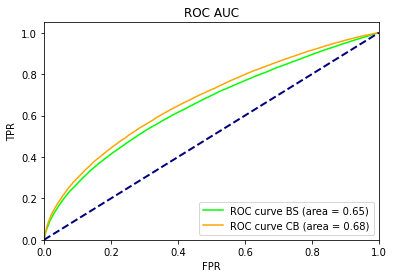

In [95]:
fpr3, tpr3, tresholds3 = roc_curve(y_test, y_score_cb)

roc_auc3 = auc(fpr3, tpr3)

# plt.plot(fpr_2, tpr_2, color='red', label='ROC curve GR (area = %0.2f)' % roc_auc_2)
plt.plot(fpr, tpr, color='lime', label='ROC curve BS (area = %0.2f)' % roc_auc)
plt.plot(fpr3, tpr3, color='orange', label='ROC curve CB (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC')
plt.legend(loc='lower right')
plt.show()

Learning rate set to 0.132047
0:	learn: 0.6587861	total: 17.9ms	remaining: 17.9s
250:	learn: 0.5448359	total: 4.14s	remaining: 12.4s
500:	learn: 0.5374425	total: 8.23s	remaining: 8.2s
750:	learn: 0.5310281	total: 12.4s	remaining: 4.12s
999:	learn: 0.5251121	total: 16.7s	remaining: 0us
Learning rate set to 0.132047
0:	learn: 0.6586306	total: 26.9ms	remaining: 26.9s
250:	learn: 0.5444358	total: 4.31s	remaining: 12.9s
500:	learn: 0.5370676	total: 8.51s	remaining: 8.48s
750:	learn: 0.5306797	total: 12.9s	remaining: 4.27s
999:	learn: 0.5247744	total: 17.2s	remaining: 0us
Learning rate set to 0.132047
0:	learn: 0.6587661	total: 20.1ms	remaining: 20.1s
250:	learn: 0.5440731	total: 4.13s	remaining: 12.3s
500:	learn: 0.5367468	total: 8.28s	remaining: 8.24s
750:	learn: 0.5303867	total: 12.4s	remaining: 4.12s
999:	learn: 0.5245427	total: 16.5s	remaining: 0us
Learning rate set to 0.132047
0:	learn: 0.6585921	total: 17.7ms	remaining: 17.7s
250:	learn: 0.5439298	total: 4.1s	remaining: 12.2s
500:	lea

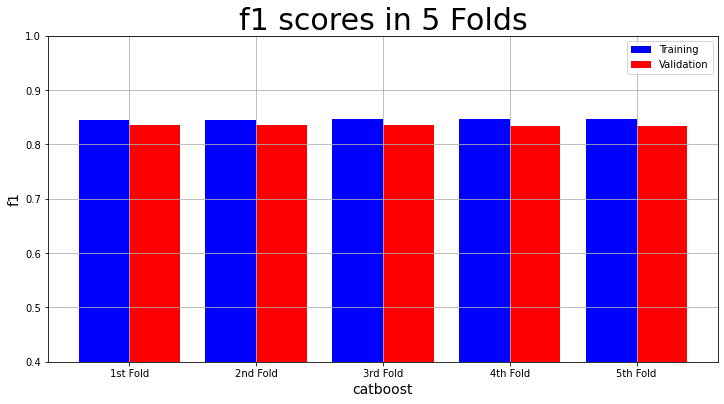

In [98]:
catboost_result = cross_validation(catboost, X, y, 5)

model_name = "catboost"
plot_result(model_name,
            "f1",
            "f1 scores in 5 Folds",
            catboost_result["Training F1 scores"],
            catboost_result["Validation F1 scores"])

In [100]:
print(f'Значения roc_auc при кроссвалидации: {catboost_result["Validation F1 scores"]}')
print(f'Mean roc_auc при кроссвалидации: {catboost_result["Validation F1 scores"].mean()}')
print(f'Std roc_auc при кроссвалидации: {catboost_result["Validation F1 scores"].std()}')

Значения roc_auc при кроссвалидации: [0.83631319 0.83547333 0.83497476 0.83318878 0.83429372]
Mean roc_auc при кроссвалидации: 0.8348487530884434
Std roc_auc при кроссвалидации: 0.0010596338140134753


In [99]:
metrics['Catboost'] = [catboost_result["Validation roc_auc scores"].mean(),
                              precision_score(y_test, y_pred_cb),
                              recall_score(y_test, y_pred_cb),
                              f1_score(y_test, y_pred_cb),
                              log_loss(y_test, y_pred_cb)]
metrics

,Baseline_LogReg,Catboost
roc_auc,0.651400,0.675242
precision,0.819579,0.731925
recall,0.520766,0.972460
f1,0.636864,0.835220
logloss,15.437427,9.974392


### Tunning catboost with Grid Search

In [106]:
parametrs_grid = {'iterations': [50, 100, 500, 1000],
          'depth': [4, 5, 6],
          'loss_function': ['Logloss'],
          'l2_leaf_reg': np.logspace(-20, -19, 3),
          'learning_rate': [0.01, 0.02, 0.05, 0.1],
          'leaf_estimation_iterations': [10],
          'eval_metric': ['F1'],
          'random_seed': [42]
         }

catboost_gr = CatBoostClassifier(metric_period=250)
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_catboost = GridSearchCV(catboost_gr, parametrs_grid, scoring='roc_auc', cv=cv, verbose=2)

In [107]:
%%time
grid_catboost.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
0:	learn: 0.8383005	total: 24.9ms	remaining: 1.22s
49:	learn: 0.8383005	total: 469ms	remaining: 0us
[CV] END depth=4, eval_metric=F1, iterations=50, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, loss_function=Logloss, random_seed=42; total time=   0.6s
0:	learn: 0.8383005	total: 10.7ms	remaining: 526ms
49:	learn: 0.8383005	total: 465ms	remaining: 0us
[CV] END depth=4, eval_metric=F1, iterations=50, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, loss_function=Logloss, random_seed=42; total time=   0.6s
0:	learn: 0.8383013	total: 11.2ms	remaining: 550ms
49:	learn: 0.8383013	total: 455ms	remaining: 0us
[CV] END depth=4, eval_metric=F1, iterations=50, l2_leaf_reg=1e-20, leaf_estimation_iterations=10, learning_rate=0.01, loss_function=Logloss, random_seed=42; total time=   0.6s
0:	learn: 0.8383005	total: 10.5ms	remaining: 514ms
49:	learn: 0.8383005	total: 447ms	remaining: 0us
[CV] E

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=None, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f8287cf42b0>,
             param_grid={'depth': [4, 5, 6], 'eval_metric': ['F1'],
                         'iterations': [50, 100, 500, 1000],
                         'l2_leaf_reg': array([1.00000000e-20, 3.16227766e-20, 1.00000000e-19]),
                         'leaf_estimation_iterations': [10],
                         'learning_rate': [0.01, 0.02, 0.05, 0.1],
                         'loss_function': ['Logloss'], 'random_seed': [42]},
             scoring='roc_auc', verbose=2)

In [108]:
print(grid_catboost.best_score_)
print(grid_catboost.best_params_)

0.6748301469690648
{'depth': 4, 'eval_metric': 'F1', 'iterations': 1000, 'l2_leaf_reg': 1e-20, 'leaf_estimation_iterations': 10, 'learning_rate': 0.05, 'loss_function': 'Logloss', 'random_seed': 42}


In [109]:
cb_best_params = grid_catboost.best_params_

In [183]:
catboost_gr = CatBoostClassifier(**{'depth': 4, 'eval_metric': 'F1', 'iterations': 1250, 'l2_leaf_reg': 1e-20, 'leaf_estimation_iterations': 10, 'learning_rate': 0.05, 'loss_function': 'Logloss', 'random_seed': 42}, metric_period=250)
catboost_gr.fit(X_train, y_train)
# y_pred_cb_gr = catboost_gr.predict(X_test)
# y_score_cb_gr = catboost_gr.predict_proba(X_test)[:,1]

0:	learn: 0.8352474	total: 48.1ms	remaining: 1m
250:	learn: 0.8352473	total: 10.1s	remaining: 40.1s
500:	learn: 0.8352879	total: 19.4s	remaining: 29s
750:	learn: 0.8355816	total: 28.6s	remaining: 19s
1000:	learn: 0.8359277	total: 37.9s	remaining: 9.42s
1249:	learn: 0.8362547	total: 47.3s	remaining: 0us


In [58]:
fpr4, tpr4, tresholds4 = roc_curve(y_test, y_score_cb_gr)

roc_auc4 = auc(fpr4, tpr4)

#plt.plot(fpr, tpr, color='lime', label='ROC curve BS(area = %0.2f)' % roc_auc)
# plt.plot(fpr_2, tpr_2, color='red', label='ROC curve GR (area = %0.2f)' % roc_auc_2)
#plt.plot(fpr3, tpr3, color='orange', label='ROC curve CB (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='blue', label='ROC curve CB_GR (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC AUC')
plt.legend(loc='lower right')
plt.show()

NameError: name 'y_score_cb_gr' is not defined

0:	learn: 0.8528682	total: 59.6ms	remaining: 1m 14s
250:	learn: 0.8529233	total: 9.72s	remaining: 38.7s
500:	learn: 0.8529846	total: 19.2s	remaining: 28.7s
750:	learn: 0.8533406	total: 28.5s	remaining: 19s
1000:	learn: 0.8535835	total: 37.6s	remaining: 9.34s
1249:	learn: 0.8538997	total: 46.8s	remaining: 0us
0:	learn: 0.8528682	total: 50.5ms	remaining: 1m 3s
250:	learn: 0.8528809	total: 9.52s	remaining: 37.9s
500:	learn: 0.8530010	total: 18.7s	remaining: 27.9s
750:	learn: 0.8532828	total: 27.8s	remaining: 18.5s
1000:	learn: 0.8535307	total: 37.3s	remaining: 9.29s
1249:	learn: 0.8538070	total: 46.5s	remaining: 0us
0:	learn: 0.8528682	total: 66.8ms	remaining: 1m 23s
250:	learn: 0.8529964	total: 9.79s	remaining: 39s
500:	learn: 0.8530870	total: 19.1s	remaining: 28.6s
750:	learn: 0.8533400	total: 28.5s	remaining: 18.9s
1000:	learn: 0.8536016	total: 37.8s	remaining: 9.41s
1249:	learn: 0.8538727	total: 46.7s	remaining: 0us
0:	learn: 0.8528701	total: 44ms	remaining: 55s
250:	learn: 0.8529059	

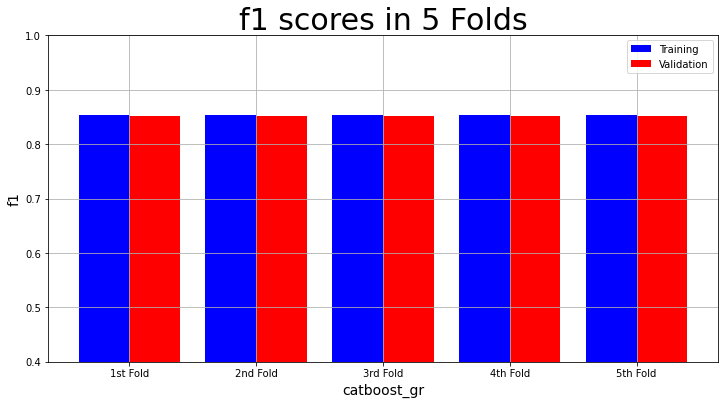

In [60]:
catboost_result_gr = cross_validation(catboost_gr, X, y, 5)

model_name = "catboost_gr"
plot_result(model_name,
            "f1",
            "f1 scores in 5 Folds",
            catboost_result_gr["Training F1 scores"],
            catboost_result_gr["Validation F1 scores"])

In [100]:
result_df.drop(columns=['customer_id'])

,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,ownareaall_sqm_diff,fav_month,fav_hour,...,top10_revenue_6,top10_revenue_7,top10_revenue_8,top10_revenue_9,tail10_ownareaall_sqm_0,tail10_ownareaall_sqm_1,tail10_ownareaall_sqm_2,top10_ownareaall_sqm_0,top10_ownareaall_sqm_1,top10_ownareaall_sqm_2
0,2255.77,9489.20,139.99,338.90,1.00,338.9,0.00,0.0,2,13,...,99.99,99.99,99.99,99.99,338.9,338.9,338.9,338.90,338.90,338.90
1,3872.76,12494.30,239.99,263.00,1.00,227.3,0.00,0.0,7,13,...,120.97,120.97,120.97,119.99,227.3,227.3,227.3,263.00,263.00,263.00
2,7881.45,11509.95,399.99,435.43,1.00,100.0,0.00,0.0,1,14,...,269.99,259.99,239.99,234.96,144.6,100.0,100.0,435.43,435.43,435.43
3,1491.88,2491.20,200.00,207.60,44.98,207.6,0.00,0.0,9,16,...,109.99,99.99,99.99,49.99,207.6,207.6,207.6,207.60,207.60,207.60
4,1676.89,1651.42,309.99,137.14,9.99,124.0,0.00,0.0,12,15,...,109.99,99.99,99.99,60.00,124.0,124.0,124.0,137.14,137.14,137.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112329,1324.90,810.00,299.99,81.00,49.99,81.0,-98.99,29.4,7,19,...,99.99,99.99,94.99,49.99,81.0,81.0,81.0,81.00,81.00,81.00
112330,1131.94,2836.20,299.99,285.20,1.00,89.8,0.00,-169.1,7,19,...,84.98,70.03,16.00,14.99,89.8,89.8,89.8,285.20,285.20,285.20
112331,579.95,855.20,124.99,106.90,10.00,106.9,-228.93,-169.1,7,15,...,65.00,10.00,0.00,0.00,106.9,106.9,106.9,106.90,106.90,106.90
112332,739.95,1350.00,209.99,225.00,70.00,225.0,237.99,-198.5,7,17,...,0.00,0.00,0.00,0.00,225.0,225.0,225.0,225.00,225.00,225.00


In [113]:
test_prediction_class = catboost_gr.predict_proba(result_df.drop(columns=['customer_id']))

In [180]:
df_res111

,Unnamed: 0,customer_id,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,ownareaall_sqm_diff,...,top10_revenue_8,top10_revenue_9,tail10_ownareaall_sqm_0,tail10_ownareaall_sqm_1,tail10_ownareaall_sqm_2,top10_ownareaall_sqm_0,top10_ownareaall_sqm_1,top10_ownareaall_sqm_2,target_class,target_2
0,0,52341,2255.77,9489.20,139.99,338.90,1.00,338.9,0.00,0.0,...,99.99,99.99,338.9,338.9,338.9,338.90,338.90,338.90,1,8.640671
1,1,69175,3872.76,12494.30,239.99,263.00,1.00,227.3,0.00,0.0,...,120.97,119.99,227.3,227.3,227.3,263.00,263.00,263.00,1,5.399877
2,2,73427,7881.45,11509.95,399.99,435.43,1.00,100.0,0.00,0.0,...,239.99,234.96,144.6,100.0,100.0,435.43,435.43,435.43,1,3.053302
3,3,134577,1491.88,2491.20,200.00,207.60,44.98,207.6,0.00,0.0,...,99.99,49.99,207.6,207.6,207.6,207.60,207.60,207.60,0,34.125245
4,4,156357,1676.89,1651.42,309.99,137.14,9.99,124.0,0.00,0.0,...,99.99,60.00,124.0,124.0,124.0,137.14,137.14,137.14,1,24.148529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112329,112329,46540272,1324.90,810.00,299.99,81.00,49.99,81.0,-98.99,29.4,...,94.99,49.99,81.0,81.0,81.0,81.00,81.00,81.00,1,21.224468
112330,112330,46569275,1131.94,2836.20,299.99,285.20,1.00,89.8,0.00,-169.1,...,16.00,14.99,89.8,89.8,89.8,285.20,285.20,285.20,1,14.115540
112331,112331,46601088,579.95,855.20,124.99,106.90,10.00,106.9,-228.93,-169.1,...,0.00,0.00,106.9,106.9,106.9,106.90,106.90,106.90,1,17.658994
112332,112332,46632765,739.95,1350.00,209.99,225.00,70.00,225.0,237.99,-198.5,...,0.00,0.00,225.0,225.0,225.0,225.00,225.00,225.00,1,9.273658


In [177]:
df_res111 = pd.read_csv('result_df.csv')

In [179]:
df_res111['target_2'] = test_prediction_class[:,0]*60

In [110]:
result_df['target_class'] = test_prediction_class

In [112]:
result_df.to_csv('result_df.csv')

In [107]:
pd.concat([pd.DataFrame(test_prediction_class, columns=['pred_class']), result_df['customer_id']]).to_csv('test_prediction_class.csv')

In [61]:
print(f'Значения roc_auc при кроссвалидации: {catboost_result_gr["Validation F1 scores"]}')
print(f'Mean roc_auc при кроссвалидации: {catboost_result_gr["Validation F1 scores"].mean()}')
print(f'Std roc_auc при кроссвалидации: {catboost_result_gr["Validation F1 scores"].std()}')

Значения roc_auc при кроссвалидации: [0.85242736 0.85275694 0.85199338 0.85202498 0.85248536]
Mean roc_auc при кроссвалидации: 0.8523376019887647
Std roc_auc при кроссвалидации: 0.00029050187017534533


In [62]:
metrics = pd.DataFrame(index=['roc_auc', 'precision', 'recall', 'f1', 'logloss'])
metrics['Catboost_best_params'] = [catboost_result_gr["Validation roc_auc scores"].mean(),
                              precision_score(y_test, y_score),
                              recall_score(y_test, y_score),
                              f1_score(y_test, y_score),
                              log_loss(y_test, y_score)]
metrics

NameError: name 'y_score' is not defined

In [170]:
y_score_cb_gr.copy()

array([0., 0., 1., ..., 0., 0., 1.])

In [169]:
y_score = y_score_cb_gr

In [167]:
y_score = pd.Series(y_score)

In [168]:
pd.Series(y_score).quantile(0.5)

0.0

In [162]:
y_score[y_score > pd.Series(y_score).quantile(0.9)]

Series([], dtype: float64)

In [158]:
y_score[y_score > pd.Series(y_score).quantile(0.9999)] = 1
y_score[y_score != 1] = 0

In [129]:

pd.DataFrame({'feature_importance': catboost_gr.get_feature_importance(), 
              'feature_names': X_train.columns}).sort_values(by=['feature_importance'], 
                                                           ascending=False).head(50)


,feature_importance,feature_names
0,9.418855,revenue
8,7.662849,fav_month
23,7.098462,tail10_feature1_0
22,3.665497,top10_dish_9
1,3.144422,ownareaall_sqm
20,2.899738,top10_dish_7
32,2.731727,tail10_feature1_9
52,2.716549,top10_revenue_9
19,2.582815,top10_dish_6
4,2.512791,revenue_min


In [130]:
y_pred_cb_gr

array([1, 1, 1, ..., 1, 1, 1])

KeyboardInterrupt: 

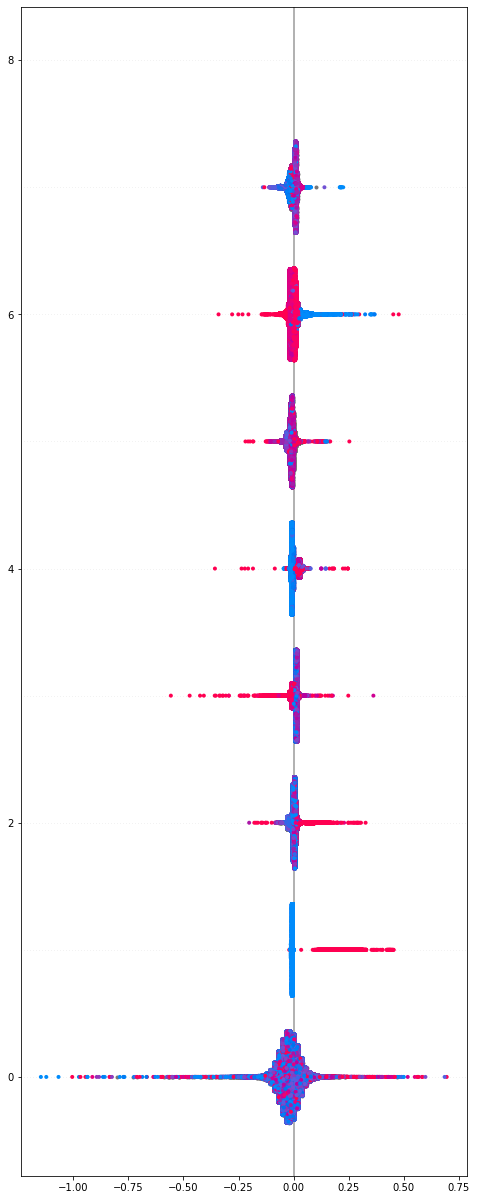

In [121]:
shap.plots.beeswarm(shap_values, max_display=50)

In [103]:
cals = pd.read_csv("df_with_cals_eeee.csv")

In [107]:
df_model = pd.merge(df_model, cals[['customer_id', 'Белки',
       'Жиры', 'Углеводы', 'Калории', 'cls_fav_dish_Бургеры из Курицы',
       'cls_fav_dish_Бургеры из говядины',
       'cls_fav_dish_Бургеры из курицы и рыбы', 'cls_fav_dish_Горячие напитки',
       'cls_fav_dish_Десерты', 'cls_fav_dish_Курица',
       'cls_fav_dish_Молочные коктейли', 'cls_fav_dish_Напитки',
       'cls_fav_dish_Новинки', 'cls_fav_dish_Острое меню',
       'cls_fav_dish_Роллы', 'cls_fav_dish_Салаты', 'cls_fav_dish_Соусы',
       'cls_fav_dish_Холодные напитки', 'cls_fav_dish_закуски',
       'cls_fav_dish_картофель', 'cls_fav_dish_креветки']], on='customer_id')

### Test

In [168]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
X = df_model.drop(['buy_post', 'customer_id', 'date_diff_post'], axis=1)
y = df_model['date_diff_post']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

params = {'learning_rate': 0.014000000000000002,
 'depth': 7,
 'l2_leaf_reg': 3.5,
 'min_child_samples': 16}

model = CatBoostRegressor(**params)

# Fit model
model.fit(X_train, y_train)
# Get predictions
# preds = model.predict(X_test)

0:	learn: 17.1763908	total: 55.6ms	remaining: 55.6s
1:	learn: 17.1743826	total: 106ms	remaining: 52.9s
2:	learn: 17.1723930	total: 160ms	remaining: 53.1s
3:	learn: 17.1704203	total: 217ms	remaining: 54.1s
4:	learn: 17.1686092	total: 267ms	remaining: 53.1s
5:	learn: 17.1669935	total: 326ms	remaining: 54s
6:	learn: 17.1652576	total: 380ms	remaining: 53.9s
7:	learn: 17.1635417	total: 439ms	remaining: 54.4s
8:	learn: 17.1618413	total: 502ms	remaining: 55.2s
9:	learn: 17.1604264	total: 555ms	remaining: 54.9s
10:	learn: 17.1588260	total: 601ms	remaining: 54s
11:	learn: 17.1573101	total: 656ms	remaining: 54s
12:	learn: 17.1558019	total: 705ms	remaining: 53.6s
13:	learn: 17.1543839	total: 759ms	remaining: 53.4s
14:	learn: 17.1528993	total: 808ms	remaining: 53s
15:	learn: 17.1516655	total: 856ms	remaining: 52.7s
16:	learn: 17.1502083	total: 907ms	remaining: 52.4s
17:	learn: 17.1488421	total: 952ms	remaining: 52s
18:	learn: 17.1475422	total: 1.01s	remaining: 52s
19:	learn: 17.1461946	total: 1.05

In [185]:
preds = model.predict(df_res111.drop(columns=['Unnamed: 0','customer_id','target_class','target_2']))

In [187]:
df_res111['target2_by_model'] = preds

In [174]:
mean_squared_error(y_test, preds, squared=False)

17.056801957945105

In [188]:
df_res111

,Unnamed: 0,customer_id,revenue,ownareaall_sqm,revenue_max,ownareaall_sqm_max,revenue_min,ownareaall_sqm_min,revenue_diff,ownareaall_sqm_diff,...,top10_revenue_9,tail10_ownareaall_sqm_0,tail10_ownareaall_sqm_1,tail10_ownareaall_sqm_2,top10_ownareaall_sqm_0,top10_ownareaall_sqm_1,top10_ownareaall_sqm_2,target_class,target_2,target2_by_model
0,0,52341,2255.77,9489.20,139.99,338.90,1.00,338.9,0.00,0.0,...,99.99,338.9,338.9,338.9,338.90,338.90,338.90,1,8.640671,16.431520
1,1,69175,3872.76,12494.30,239.99,263.00,1.00,227.3,0.00,0.0,...,119.99,227.3,227.3,227.3,263.00,263.00,263.00,1,5.399877,15.292136
2,2,73427,7881.45,11509.95,399.99,435.43,1.00,100.0,0.00,0.0,...,234.96,144.6,100.0,100.0,435.43,435.43,435.43,1,3.053302,13.037326
3,3,134577,1491.88,2491.20,200.00,207.60,44.98,207.6,0.00,0.0,...,49.99,207.6,207.6,207.6,207.60,207.60,207.60,0,34.125245,16.993163
4,4,156357,1676.89,1651.42,309.99,137.14,9.99,124.0,0.00,0.0,...,60.00,124.0,124.0,124.0,137.14,137.14,137.14,1,24.148529,17.696714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112329,112329,46540272,1324.90,810.00,299.99,81.00,49.99,81.0,-98.99,29.4,...,49.99,81.0,81.0,81.0,81.00,81.00,81.00,1,21.224468,16.256875
112330,112330,46569275,1131.94,2836.20,299.99,285.20,1.00,89.8,0.00,-169.1,...,14.99,89.8,89.8,89.8,285.20,285.20,285.20,1,14.115540,18.768846
112331,112331,46601088,579.95,855.20,124.99,106.90,10.00,106.9,-228.93,-169.1,...,0.00,106.9,106.9,106.9,106.90,106.90,106.90,1,17.658994,16.364876
112332,112332,46632765,739.95,1350.00,209.99,225.00,70.00,225.0,237.99,-198.5,...,0.00,225.0,225.0,225.0,225.00,225.00,225.00,1,9.273658,16.041121


In [189]:
df_res111.to_csv('subm.csv')

In [190]:
df_test = pd.read_parquet("test_dataset_hackaton2023_test.gzip")

In [191]:
df_test.join(df_res, on='customer_id', how)

,customer_id,group_name,revenue,startdatetime,dish_name,ownareaall_sqm,format_name
1773606,13220760,test,0.28,2022-12-22 13:09:11,"Липтон Лимон в бутылке 0,5л",174.40,Фудкорт с туалетом
4035564,30315975,test,139.99,2023-03-05 16:45:05,Пиво Балтика 7 0.5л розлив,235.00,Отдельно стоящий
2507770,21679985,test,36.00,2022-12-13 16:10:55,Кинг Фри мал,165.00,Фудкорт без туалета
3963775,29754274,test,230.00,2023-03-14 14:10:43,Цезарь ролл со стрипсами,150.00,Фудкорт без туалета
859943,7797823,test,204.96,2022-10-22 14:09:28,Up Гранд Чиз Фреш,114.50,Фудкорт без туалета
...,...,...,...,...,...,...,...
1677742,12727388,test,99.99,2023-04-29 10:12:21,Сырные Медальоны (6 шт.),92.00,Фудкорт без туалета
4450230,36332632,test,79.98,2023-02-12 19:57:23,"Липтон Грин Дж 0,3",216.93,Отдельно стоящий без внешней зоны
3882998,29278039,test,209.99,2022-11-08 15:39:53,Воппер Ролл,300.00,Отдельно стоящий с внешней зоной
1356999,11223378,test,679.98,2023-01-31 19:15:39,Двойной Воппер с сыром,136.50,Фудкорт без туалета


In [ ]:
df_res = pd.read_csv('subm.csv')